![uni](pic/swansea.png)
# Build a CNN Based Trustworthy Decision System for Plant Disease Detection

Zheng Sun

802057

# Demonstration

This demostration will show:
* Features of Dataset 1 
* Load AlexNet and ResNet 18 for test dataset
* Run `LIME` on test dataset images
* Analyse what is a trustworthy model

In [1]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid  
import numpy as np
%matplotlib inline

# Dataset 1: Plant Diseases Recognition
This Dataset has three categories:
* Healthy
* Powdery
* Rust

In [2]:
data_dir = "../input/plant disease regonition"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)
print(diseases)

['Healthy', 'Powdery', 'Rust']


## Set Tranform of Dataset1
* Resize to 256x256
* Transform to Tensor

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor()
])

## DataLoader
* Apply the transform
* Use DataLoader to load train and valid data

In [4]:
batch_size = 18
train = ImageFolder(train_dir, transform=transform)
valid = ImageFolder(valid_dir, transform=transform) 
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [5]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


## Define Method for Showing Images

In [6]:
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=6).permute(1, 2, 0))
        break

## Images of Dataset 1

### Single Image

Label :Healthy(0)


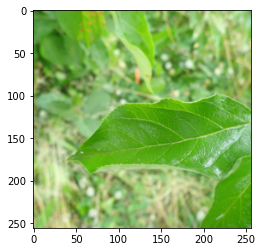

In [7]:
show_image(*train[0])

## One batch of Images

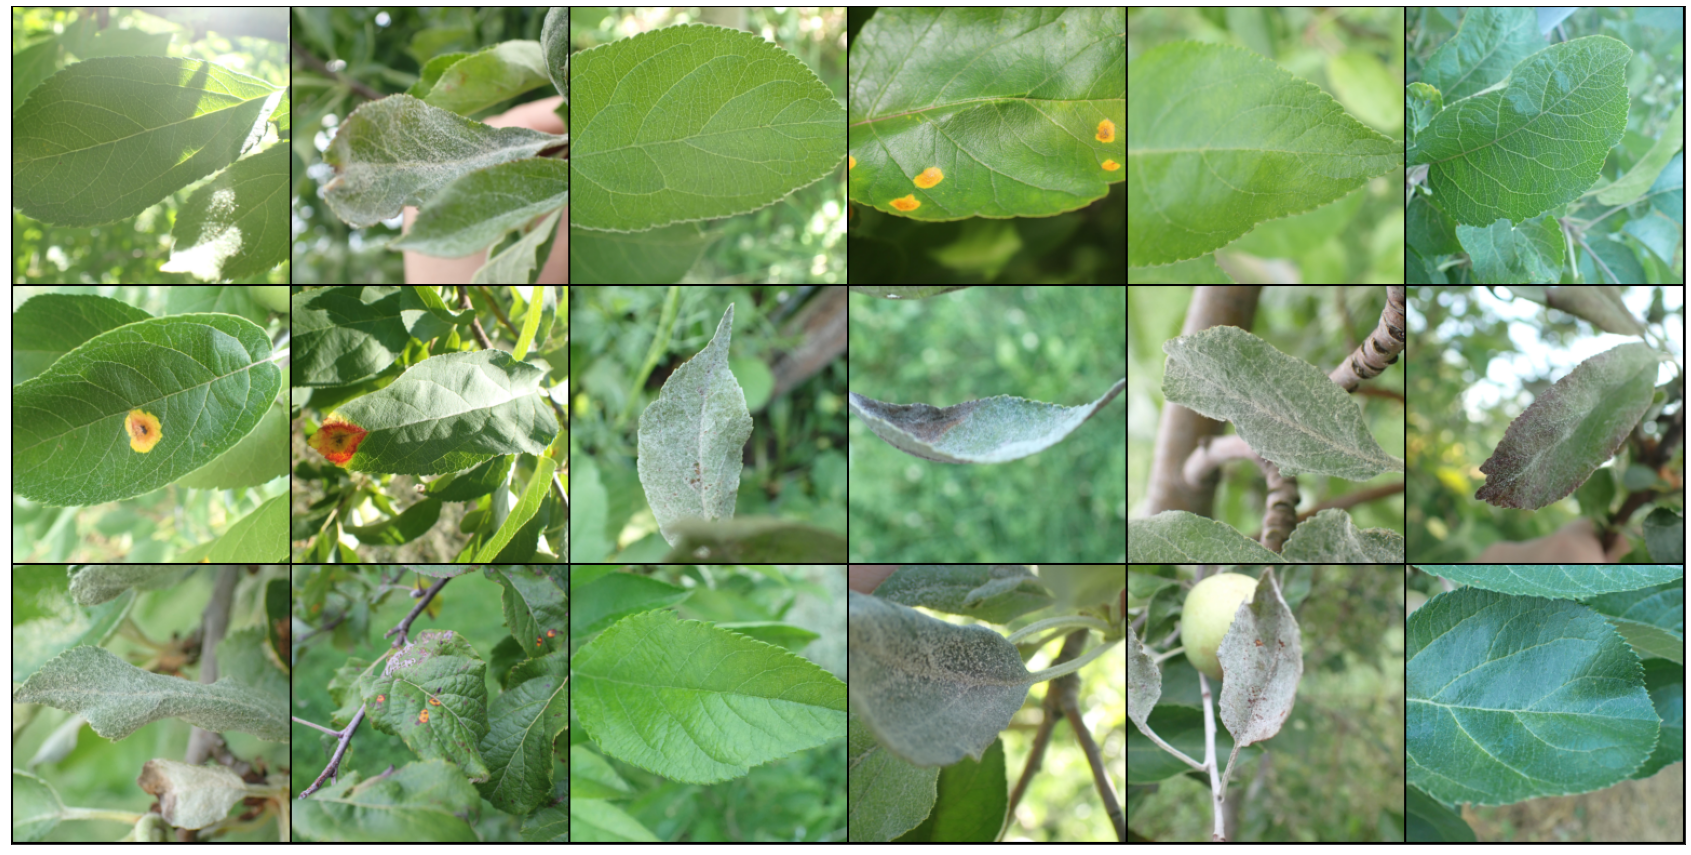

In [8]:
show_batch(train_dl) 

## Load trained model - AlexNet

In [9]:
PATH = './plant3_AlexNet_full.pth'
model = torch.load(PATH)
model.cuda()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=9216, out_features=2048, bias=True)
  (15): ReLU()
  (16): Dropout(p=0.5, inplace=False)
  (17): Linear(in_features=2048, out_features=512, bias=True)
  (18): ReLU()
  (19): Dropout(p=0.5, inplace=False)
  (20): Linear(in_featur

## Model Accuracy
After 20 epochs training:
* Accuracy for train dataset: 95.24%
* Accuracy for valid dataset: 91.33%
   
   
![AlexNetAcc](pic/AlexNetAcc.png)

In [10]:
def predict_image(img, model):
    xb = img.unsqueeze(0).cuda()
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return train.classes[preds[0].item()]

## Set transform and load test data

In [11]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225]),
])

In [12]:
test_dir = data_dir + "/test"
test = ImageFolder(test_dir, transform=transform)
test_images = sorted(os.listdir(test_dir+"/test"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Yueqiao\anaconda3\envs\ttorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Label: Healthy (1).jpg , Predicted: Healthy


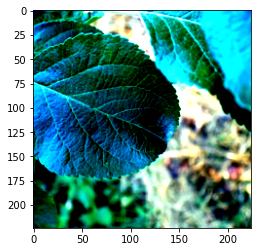

In [13]:
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [14]:
for i, (img, label) in enumerate(test):
    if i <= 29:
        print('Label:', test_images[i], ', Predicted:', predict_image(img, model), i)

Label: Healthy (1).jpg , Predicted: Healthy 0
Label: Healthy (10).jpg , Predicted: Healthy 1
Label: Healthy (11).jpg , Predicted: Healthy 2
Label: Healthy (12).jpg , Predicted: Healthy 3
Label: Healthy (13).jpg , Predicted: Healthy 4
Label: Healthy (14).jpg , Predicted: Healthy 5
Label: Healthy (15).jpg , Predicted: Healthy 6
Label: Healthy (16).jpg , Predicted: Rust 7
Label: Healthy (17).jpg , Predicted: Healthy 8
Label: Healthy (18).jpg , Predicted: Healthy 9
Label: Healthy (19).jpg , Predicted: Healthy 10
Label: Healthy (2).jpg , Predicted: Healthy 11
Label: Healthy (20).jpg , Predicted: Healthy 12
Label: Healthy (3).jpg , Predicted: Healthy 13
Label: Healthy (4).jpg , Predicted: Powdery 14
Label: Healthy (5).jpg , Predicted: Healthy 15
Label: Healthy (6).jpg , Predicted: Healthy 16
Label: Healthy (7).jpg , Predicted: Healthy 17
Label: Healthy (8).jpg , Predicted: Healthy 18
Label: Healthy (9).jpg , Predicted: Healthy 19
Label: Powdery (1).jpg , Predicted: Powdery 20
Label: Powdery 

In [15]:
for i, (img, label) in enumerate(test):
    if i > 29:
        print('Label:', test_images[i], ', Predicted:', predict_image(img, model), i)

Label: Powdery (19).jpg , Predicted: Rust 30
Label: Powdery (2).jpg , Predicted: Powdery 31
Label: Powdery (20).jpg , Predicted: Powdery 32
Label: Powdery (3).jpg , Predicted: Powdery 33
Label: Powdery (4).jpg , Predicted: Powdery 34
Label: Powdery (5).jpg , Predicted: Powdery 35
Label: Powdery (6).jpg , Predicted: Powdery 36
Label: Powdery (7).jpg , Predicted: Powdery 37
Label: Powdery (8).jpg , Predicted: Powdery 38
Label: Powdery (9).jpg , Predicted: Powdery 39
Label: Rust (1).jpg , Predicted: Rust 40
Label: Rust (10).jpg , Predicted: Rust 41
Label: Rust (11).jpg , Predicted: Rust 42
Label: Rust (12).jpg , Predicted: Rust 43
Label: Rust (13).jpg , Predicted: Rust 44
Label: Rust (14).jpg , Predicted: Rust 45
Label: Rust (15).jpg , Predicted: Rust 46
Label: Rust (16).jpg , Predicted: Rust 47
Label: Rust (17).jpg , Predicted: Rust 48
Label: Rust (18).jpg , Predicted: Powdery 49
Label: Rust (19).jpg , Predicted: Rust 50
Label: Rust (2).jpg , Predicted: Rust 51
Label: Rust (20).jpg , Pre

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Healthy (4).jpg , Predicted: Powdery


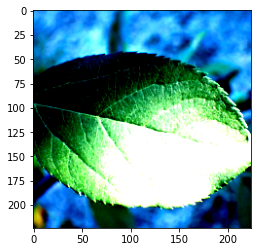

In [16]:
img, label = test[14]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[14], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Healthy (16).jpg , Predicted: Rust


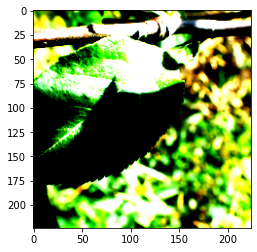

In [17]:
img, label = test[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[7], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Powdery (19).jpg , Predicted: Rust


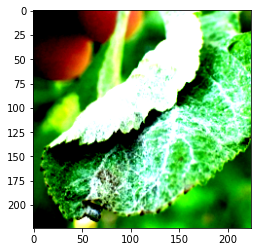

In [18]:
img, label = test[30]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[30], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Rust (18).jpg , Predicted: Powdery


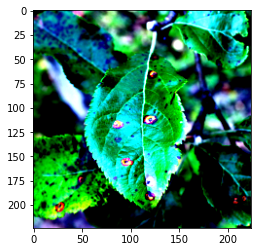

In [19]:
img, label = test[49]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[49], ', Predicted:', predict_image(img, model))

# Set up LIME

In [20]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf

def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB') 

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

In [21]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

# Define four Images

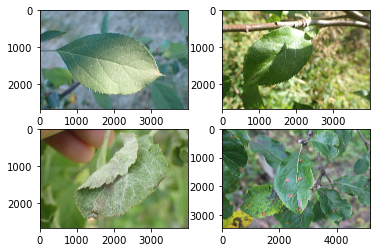

In [22]:
img0 = get_image(data_dir+'/test/test/Healthy (4).JPG')
img1 = get_image(data_dir+'/test/test/Healthy (16).JPG')
img2 = get_image(data_dir+'/test/test/Powdery (19).JPG')
img3 = get_image(data_dir+'/test/test/Rust (18).JPG')
imgs = [img0, img1, img2, img3]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imgs[i])
plt.show()

# Image 0: Healthy (4), prediction: Powdery
<img style="float: left;" src="pic/Healthy (4).jpg" width = "50%">

In [23]:
test_pred = batch_predict([pill_transf(img0)])
test_pred.squeeze().argmax()

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img0)), 
                                         batch_predict,
                                         top_labels=5, 
                                         hide_color=0,
                                         num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

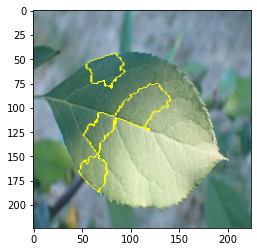

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

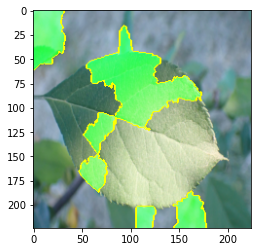

In [25]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# Image 1: Healthy (16), prediction: Rust
<img style="float: left;" src="pic/Healthy(16).jpg" width = "50%">

In [26]:
test_pred = batch_predict([pill_transf(img1)])
test_pred.squeeze().argmax()

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img1)), 
                                         batch_predict,
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

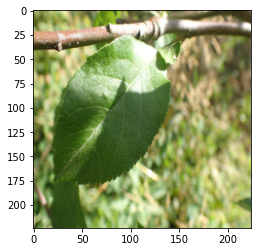

In [27]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

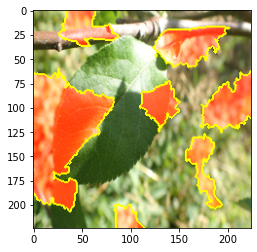

In [28]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# Image 2: Powdery (19)
<img style="float: left;" src="pic/Powdery(19).jpg" width = "50%">

In [29]:
test_pred = batch_predict([pill_transf(img2)])
test_pred.squeeze().argmax()

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img2)), 
                                         batch_predict,
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

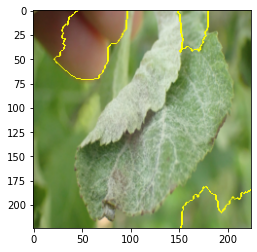

In [30]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

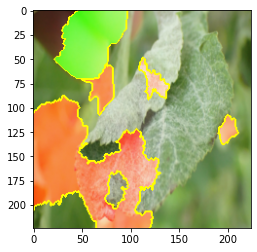

In [31]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# Image 3: Rust (18)
<img style="float: left;" src="pic/Rust(18).jpg" width = "50%">

In [32]:
test_pred = batch_predict([pill_transf(img3)])
test_pred.squeeze().argmax()

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img3)), 
                                         batch_predict,
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

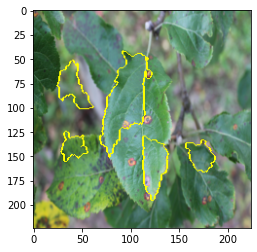

In [33]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

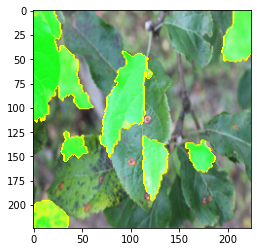

In [34]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# Result
By using LIME we can find that, the evidence provided by AlexNet cannot support its prediction.


![img](pic/healthy4_Alex.png)|![img](pic/healthy16_Alex.png)|![img](pic/powdery19_Alex.png)|![img](pic/rust18_alex.png)
---|---|---|---

* In figure 1, AlexNet is mislead by the sunlight spots on the leaf
* In figure 2, AlexNet cannot provide any evidence to support its prediction
* In figure 3, AlexNet recognized the human finger as rust spot
* In figure 4, AlexNet's evidence is useless, no rust spot is covered

# ResNet-18 on dataset 1

In [35]:
PATH = './plant3_Res18_full.pth'
model = torch.load(PATH)
model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Accuracy and Loss on Dataset 1
* Accuracy of Train: 100%
* Accuracy of Valid: 98%
![1](pic/accRes.png)

# ResNet-18 with test dataset

In [36]:
for i, (img, label) in enumerate(test):
    if i <= 29:
        print('Label:', test_images[i], ', Predicted:', predict_image(img, model), i)

Label: Healthy (1).jpg , Predicted: Healthy 0
Label: Healthy (10).jpg , Predicted: Healthy 1
Label: Healthy (11).jpg , Predicted: Healthy 2
Label: Healthy (12).jpg , Predicted: Healthy 3
Label: Healthy (13).jpg , Predicted: Healthy 4
Label: Healthy (14).jpg , Predicted: Healthy 5
Label: Healthy (15).jpg , Predicted: Healthy 6
Label: Healthy (16).jpg , Predicted: Healthy 7
Label: Healthy (17).jpg , Predicted: Healthy 8
Label: Healthy (18).jpg , Predicted: Healthy 9
Label: Healthy (19).jpg , Predicted: Healthy 10
Label: Healthy (2).jpg , Predicted: Healthy 11
Label: Healthy (20).jpg , Predicted: Healthy 12
Label: Healthy (3).jpg , Predicted: Healthy 13
Label: Healthy (4).jpg , Predicted: Healthy 14
Label: Healthy (5).jpg , Predicted: Healthy 15
Label: Healthy (6).jpg , Predicted: Healthy 16
Label: Healthy (7).jpg , Predicted: Healthy 17
Label: Healthy (8).jpg , Predicted: Healthy 18
Label: Healthy (9).jpg , Predicted: Healthy 19
Label: Powdery (1).jpg , Predicted: Powdery 20
Label: Powde

In [37]:
for i, (img, label) in enumerate(test):
    if i > 29:
        print('Label:', test_images[i], ', Predicted:', predict_image(img, model), i)

Label: Powdery (19).jpg , Predicted: Powdery 30
Label: Powdery (2).jpg , Predicted: Powdery 31
Label: Powdery (20).jpg , Predicted: Powdery 32
Label: Powdery (3).jpg , Predicted: Powdery 33
Label: Powdery (4).jpg , Predicted: Powdery 34
Label: Powdery (5).jpg , Predicted: Powdery 35
Label: Powdery (6).jpg , Predicted: Powdery 36
Label: Powdery (7).jpg , Predicted: Powdery 37
Label: Powdery (8).jpg , Predicted: Powdery 38
Label: Powdery (9).jpg , Predicted: Powdery 39
Label: Rust (1).jpg , Predicted: Rust 40
Label: Rust (10).jpg , Predicted: Rust 41
Label: Rust (11).jpg , Predicted: Rust 42
Label: Rust (12).jpg , Predicted: Rust 43
Label: Rust (13).jpg , Predicted: Rust 44
Label: Rust (14).jpg , Predicted: Rust 45
Label: Rust (15).jpg , Predicted: Rust 46
Label: Rust (16).jpg , Predicted: Rust 47
Label: Rust (17).jpg , Predicted: Rust 48
Label: Rust (18).jpg , Predicted: Rust 49
Label: Rust (19).jpg , Predicted: Rust 50
Label: Rust (2).jpg , Predicted: Rust 51
Label: Rust (20).jpg , Pre

# Image 0: Healthy (4), prediction: Healthy
<img style="float: left;" src="pic/Healthy (4).jpg" width = "50%">

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Healthy (4).jpg , Predicted: Healthy


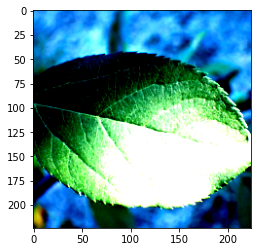

In [38]:
img, label = test[14]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[14], ', Predicted:', predict_image(img, model))

In [39]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img0)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=5000)


  0%|          | 0/5000 [00:00<?, ?it/s]

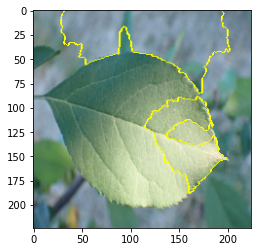

In [40]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

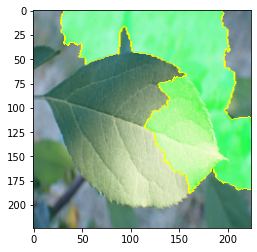

In [41]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# Image 1: Healthy (16)
<img style="float: left;" src="pic/Healthy(16).jpg" width = "50%">

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Healthy (16).jpg , Predicted: Healthy


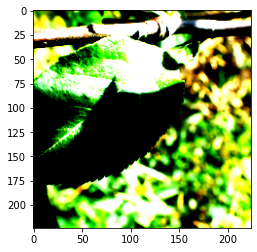

In [42]:
img, label = test[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[7], ', Predicted:', predict_image(img, model))

In [43]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img1)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

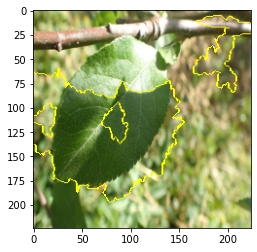

In [44]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

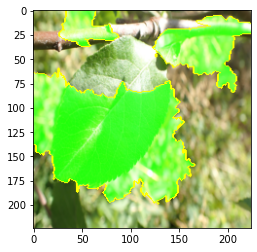

In [45]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# Image 2: Powdery (19)
<img style="float: left;" src="pic/powdery(19).jpg" width = "50%">

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Powdery (19).jpg , Predicted: Powdery


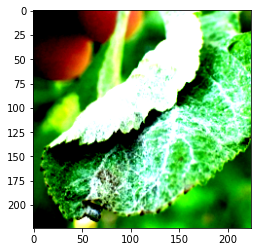

In [46]:
img, label = test[30]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[30], ', Predicted:', predict_image(img, model))

In [47]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img2)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

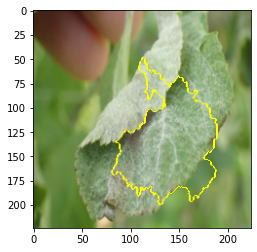

In [48]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

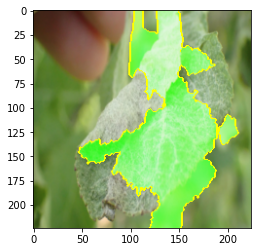

In [49]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# Image 3: Rust (18)
<img style="float: left;" src="pic/rust(18).jpg" width = "50%">

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Rust (18).jpg , Predicted: Rust


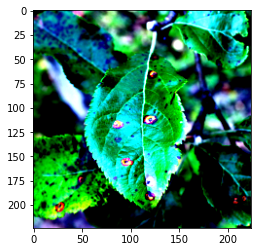

In [50]:
img, label = test[49]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[49], ', Predicted:', predict_image(img, model))

In [51]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img3)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

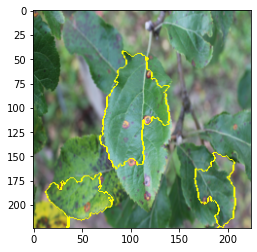

In [52]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

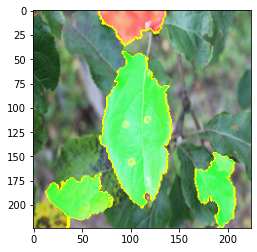

In [53]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# AlexNet and ResNet Results

![img](pic/healthy4_Alex.png)|![img](pic/healthy16_Alex.png)|![img](pic/powdery19_Alex.png)|![img](pic/rust18_alex.png)
---|---|---|---

![img](pic/healthy4_res.png)|![img](pic/healthy16_res.png)|![img](pic/powdery19_res.png)|![img](pic/rust18_res.png)
---|---|---|---

# Conclusion
Compared with AlexNet, ResNet-18 can find the feature of image better, and get more accurate prediction.